Для работы был выбран третий датасет из списка под названием «3cancer». В данном датасете представлена информация о пациентах, болеющих раком: id,   Толщина скопления, Однородность размера клеток,  Однородность формы клеток, Краевая адгезия, Размер отдельных эпителиальных клеток,  Голые ядра,  Бледный хроматин, 
Нормальные ядрышки, Митозы, Класс(2 для доброкачественных, 4 для злокачественных). Чтобы начать работу, импортируем библиотеку, а затем считываем CSV файл.Выведем первые 20 строк с помощью метода head.

In [1]:
import pandas as pd

df = pd.read_csv("3cancer.csv")

#2
print(df.head(20))

         id  clump_thickness  size_uniformity  shape_uniformity  \
0   1000025                5                1                 1   
1   1002945                5                4                 4   
2   1015425                3                1                 1   
3   1016277                6                8                 8   
4   1017023                4                1                 1   
5   1017122                8               10                10   
6   1018099                1                1                 1   
7   1018561                2                1                 2   
8   1033078                2                1                 1   
9   1033078                4                2                 1   
10  1035283                1                1                 1   
11  1036172                2                1                 1   
12  1041801                5                3                 3   
13  1043999                1                1                 

Как уже было сказано, данная таблица содержит информацию об анализах пациентов с раком. Предметная область – медицина. 
Опишем колонки подробнее:
1. id
2. Толщина скопления: 1–10
3. Однородность размера клеток: 1–10
4. Однородность формы клеток: 1–10
5. Краевая адгезия: 1–10
6. Размер отдельных эпителиальных клеток : 1 - 10
7. Голые ядра: 1 - 10
8. Бледный хроматин: 1 - 10
9. Нормальные ядрышки: 1 - 10
10. Митозы: 1 - 10
11. Класс: (2 для доброкачественных, 4 для
злокачественных)
    Теперь с помощью метода «.info» оценим данные. Этот метод возвращает название столбцов, типы данных, количество ненулевых объектов каждом столбце.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Теперь выведем названия столбцов с помощью df.columns. Названия всех колонок приемлемы.

In [2]:
print(df.columns)

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


Найдём пропуски и устраним их. При помощи метода «isna» найдём все пропуски в таблице, а также при помощи sum выведем количество пропусков в каждом столбце. Пропусков в данном наборе данных нет.

In [3]:
print(df.isna().sum())

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64


Проверим данные на наличие дубликатов. Удалим дубликаты, при помощи метода "drop_duplicates", а также перераспредилм индексы. Также выведем уникальные значения каждого столбца. Столбец 'bare_nucleoli' содержит некорректные значения '?'. Заменим их при помощи метода 'replace' на NaN, и выкинем их.

In [4]:
import numpy as np

print("Количесвто дубликатов: " + str(df.duplicated().sum()))
df = df.drop_duplicates().reset_index()
print("Количесвто дубликатов: " + str(df.duplicated().sum()))

print("Uniqe id")
print(df['id'].unique())
print("Uniqe clump_thickness")
print(df['clump_thickness'].unique())
print("Uniqe size_uniformity")
print(df['size_uniformity'].unique())
print("Uniqe shape_uniformity")
print(df['shape_uniformity'].unique())
print("Uniqe marginal_adhesion")
print(df['marginal_adhesion'].unique())
print("Uniqe epithelial_size")
print(df['epithelial_size'].unique())
print("Uniqe bare_nucleoli")
print(df['bare_nucleoli'].unique())
print("Uniqe bland_chromatin")
print(df['bland_chromatin'].unique())
print("Uniqe normal_nucleoli")
print(df['normal_nucleoli'].unique())
print("Uniqe mitoses")
print(df['mitoses'].unique())
print("Uniqe class ")
print(df['class'].unique())

df['bare_nucleoli'] = df['bare_nucleoli'].replace('?', np.NaN)
df = df.dropna(subset=['bare_nucleoli']).reset_index(drop=True)
print("Uniqe bare_nucleoli")
print(df['bare_nucleoli'].unique())

Количесвто дубликатов: 8
Количесвто дубликатов: 0
Uniqe id
[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  

Проверим все ли типы данных соответствуют действительности. Все столбцы, кроме Голых ядер соответствуют своему типу. Поэтому при помощи метода «to_numeric» изменяем тип на int. Выведем информацию. 

In [5]:
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   index              675 non-null    int64
 1   id                 675 non-null    int64
 2   clump_thickness    675 non-null    int64
 3   size_uniformity    675 non-null    int64
 4   shape_uniformity   675 non-null    int64
 5   marginal_adhesion  675 non-null    int64
 6   epithelial_size    675 non-null    int64
 7   bare_nucleoli      675 non-null    int64
 8   bland_chromatin    675 non-null    int64
 9   normal_nucleoli    675 non-null    int64
 10  mitoses            675 non-null    int64
 11  class              675 non-null    int64
dtypes: int64(12)
memory usage: 63.4 KB


Прежде чем отправить данные на вход модели и получить прогнозы, проводём — EDA, или исследовательский анализ данных. На этом этапе изучим распределения отдельных признаков и целевой переменной. Построим графики методом kdeplot().

Также построим тепловую карту корреляции, чтобы увидеть взаимосвязь между значениями и целевым признаком.

Удалим атрибут "id", так как он не несёт смысловой нагрузки для модели.

C:\Users\warfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\warfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\warfa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  wa

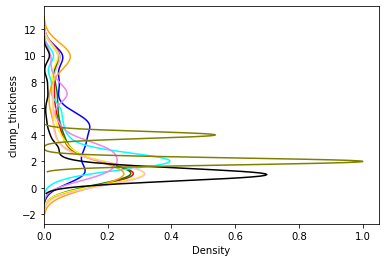

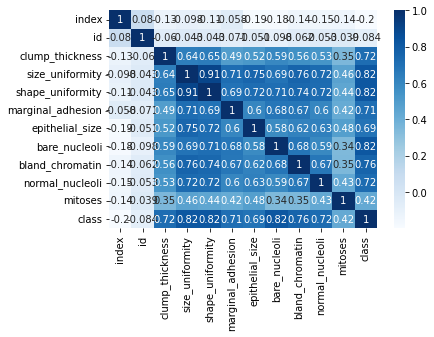

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.kdeplot(df['clump_thickness'],vertical=True,color='blue',shade=False, label='clump_thickness')
sb.kdeplot(df['size_uniformity'],vertical=True,color='red',shade=False)
sb.kdeplot(df['shape_uniformity'],vertical=True,color='green',shade=False)
sb.kdeplot(df['marginal_adhesion'],vertical=True,color='yellow',shade=False)
sb.kdeplot(df['epithelial_size'],vertical=True,color='cyan',shade=False)
sb.kdeplot(df['bare_nucleoli'],vertical=True,color='orange',shade=False)
sb.kdeplot(df['bland_chromatin'],vertical=True,color='violet',shade=False)
sb.kdeplot(df['normal_nucleoli'],vertical=True,color='pink',shade=False)
sb.kdeplot(df['mitoses'],vertical=True,color='black',shade=False)
sb.kdeplot(df['class'],vertical=True,color='olive',shade=False)
plt.show()

corr = df.corr(method = 'pearson')
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

df = df.drop('id', axis = 1)

Перед тем как разделять данные на тестовую и обучающую выборки и обучать на них различные модели, пропишем функцию проверки обученной модели, чтобы затем было проще её вызывать.

Матрица ошибок
Возможные значения классов: 2 и 4. Модель тоже может выдавать итоговый прогноз в виде значения одного из двух классов. Тогда для каждого объекта прогноз относится к одной из четырех групп:
1) Прогноз модели = 1, реальное значение = 1. Такие прогнозы называют True Positive («истинно положительные») — сокращённо TP.
2) Прогноз модели = 1, реальное значение = 0. Такие прогнозы называют False Positive («ложно положительные») — сокращённо FP.
3) Прогноз модели = 0, реальное значение = 1. Такие прогнозы называют False Negative («ложно отрицательные») — сокращённо FN.
4) Прогноз модели = 0, реальное значение = 0. Такие прогнозы называют True Negative («истинно отрицательные») — сокращённо TN

Доля правильных ответов
Это доля верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше. Метрику рассчитывают функцией accuracy_score из модуля metrics. На вход функция принимает верные и спрогнозированные значения классов на валидационной выборке.

Точность (precision) и полнота (recall)
Чтобы оценить модель без привязки к соотношению классов, рассчитывают эти метрики.
Precision говорит, какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных ответов только среди целевого класса.
Вторая метрика нацелена на минимизацию противоположных рисков — recall показывает, сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели.
Каждая метрика принимает значения от 0 до 1. Чем ближе к единице, тем лучше. Однако при настройке параметров модели — обычно порога вероятности, после которого мы относим объект к классу "1" — оптимизация одной метрики часто приводит к ухудшению другой. Метрики точности и полноты также реализованы в модуле metrics в функциях "precision_score" и "recall_score".

F1-мера
Так как precision и recall направлены на избежание противоположных рисков, нужна сводная метрика, учитывающая баланс между метриками. В sklearn.metrics F1-меру вычисляют методом "f1_score".

ROC - кривая
Для оценки качества классификатора (модели классификации) применяют метрику roc_auc, или площадь под кривой ошибок — AUC-ROC. Для оценки качества классификатора (модели классификации) применяют метрику roc_auc, или площадь под кривой ошибок — AUC-ROC. 

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
def ROC_curve (test_y,roc_auc,rf_probs):
    test_y = test_y.replace(to_replace = 2, value = 0)
    test_y = test_y.replace(to_replace = 4, value = 1)
    print (test_y)
    fpr, tpr, _ = metrics.roc_curve (test_y, rf_probs)

    #create ROC curve
    plt.plot (fpr,tpr,label=" AUC= "+str(roc_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

def model_check (test_y,predictions,rf_probs):
    # Матрица ошибок
    cm = confusion_matrix(test_y,predictions)
    tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу,чтобы вытащить нужные значения
    print("Матрица ошибок:")
    print("TN:" + str(tn), "FP:" + str(fp),"FN:" + str(fn),"TP:" + str(tp))
    
    #Доля правильных ответов
    acc = accuracy_score(test_y,predictions)
    print("Accuracy score = " + str(acc))

    #Точность (precision) и полнота (recall)
    precision = precision_score (test_y,predictions,pos_label=2)
    recall = recall_score (test_y,predictions,pos_label=2)
    print("precision_score = " + str(precision))
    print("recall_score = " + str(recall))

    #F1-мера
    f1= f1_score(test_y,predictions, pos_label=2)
    print("F1 score = " + str(f1))

    #ROC кривая
    roc_auc = roc_auc_score(test_y,rf_probs)
    print("ROC = " + str(roc_auc))
    ROC_curve (test_y,roc_auc,rf_probs)

Теперь разделим набор данных на тестовую и обучающую выборки соотношением 3 к 7.

Произведём обучение и прогнозирование методом fit-predict. Каждой модели в sklearn соответствует отдельная структура данных. DecisionTreeClassifier (англ. «классификатор дерева решений») — это структура данных для классификации деревом решений.

В переменной model будет храниться модель. Что обучить модель, нужно запустить
алгоритм обучения.

Разделим датафрейм на столбец с целевой переменной (class) и остальные данные. Теперь уже можно построить взаимосвязь и на её основании спрогнозировать y по новым X. Чтобы запустить обучение, вызовем метод fit() и передадим ему как параметр данные.

Чтобы построить прогнозы для набора данных, хватит одной строчки кода и вызова метода predict(). У нас осталась отложенная порция данных, для которых мы знаем признаки и ответы. На этом этапе мы берём только признаки, передаём их на вход обученной модели и сохраняем предсказанные значения.

Теперь вызываем функцию оценки качества и смотрим на оценки и график.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 589 to 300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   index              472 non-null    int64
 1   id                 472 non-null    int64
 2   clump_thickness    472 non-null    int64
 3   size_uniformity    472 non-null    int64
 4   shape_uniformity   472 non-null    int64
 5   marginal_adhesion  472 non-null    int64
 6   epithelial_size    472 non-null    int64
 7   bare_nucleoli      472 non-null    int64
 8   bland_chromatin    472 non-null    int64
 9   normal_nucleoli    472 non-null    int64
 10  mitoses            472 non-null    int64
 11  class              472 non-null    int64
dtypes: int64(12)
memory usage: 47.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 96 to 54
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   index  

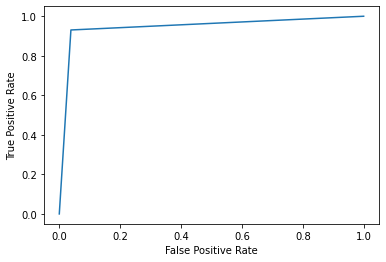

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

train.info()
test.info()
model = DecisionTreeClassifier()

train_y = train["class"]
print(train_y)
train_X = train.drop('class', axis = 1)

train_X.info()

test_y = test["class"]
test_X = test.drop('class', axis = 1)
test.info()

model.fit(train_X,train_y)
predictions = model.predict(test_X)
print("predictions:")
print(predictions)

rf_probs = model.predict_proba(test_X)[::, 1]

model_check (test_y,predictions,rf_probs)

Снова разделим набор данных на тестовую и обучающую выборки соотношением 3 к 7.

Теперь произведём обучение и прогнозирование методом случайного леса - RandomForestClassifier.

В переменной clf будет храниться модель. Что обучить модель, нужно запустить
алгоритм обучения.

Разделим датафрейм на столбец с целевой переменной (class) и остальные данные. Теперь уже можно построить взаимосвязь и на её основании спрогнозировать y по новым X. Чтобы запустить обучение, вызовем метод fit() и передадим ему как параметр данные.

Чтобы построить прогнозы для набора данных, хватит одной строчки кода и вызова метода predict(). У нас осталась отложенная порция данных, для которых мы знаем признаки и ответы. На этом этапе мы берём только признаки, передаём их на вход обученной модели и сохраняем предсказанные значения.

Теперь вызываем функцию оценки качества и смотрим на оценки и график.

Матрица ошибок:
TN:123 FP:4 FN:3 TP:73
Accuracy score = 0.9655172413793104
precision_score = 0.9761904761904762
recall_score = 0.968503937007874
F1 score = 0.9723320158102767
ROC = 0.9953895565685869
323    0
528    1
493    1
396    0
182    1
      ..
375    0
346    1
471    0
249    1
185    1
Name: class, Length: 203, dtype: int64


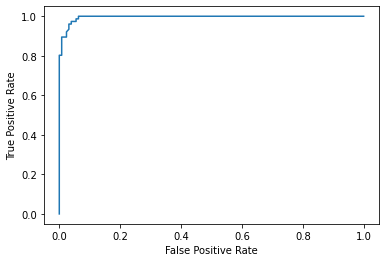

In [17]:
from sklearn.ensemble import RandomForestClassifier
train, test = train_test_split(df, test_size=0.3)
train_y = train["class"]
train_X = train.drop('class', axis = 1)
test_y = test["class"]
test_X = test.drop('class', axis = 1)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
# Вероятности для каждого класса
rf_probs = clf.predict_proba(test_X)[::, 1]

model_check (test_y,y_pred,rf_probs)

Вывод: Таким образом, в ходе выполнения лабораторной работы был выбран и описан выбранный датасет про пациентов с болезнью сердца, изучен интерфейс и возможности Jupyter Notebook, изучены базовые функции библиотеки Pandas и разработана программа, которая считывает данные, 
выводит о них информацию, удаляет дубликаты, пропуски, изменяет тип данных. Также были изучены методы классификации, стандартизированы данные, обучены различные модели, вычеслены метрики качества, получена матрица неточностей и построен график ROC-кривой.